# MidTerm Summary 6-7

## Bag of Words
- make a matrix in which for each sentence the number of occurrences of each word is displayed.

In [1]:
import re

sentences = """
Regularly and thoroughly clean your hands with an alcohol-based hand rub or wash them with soap and water.
This eliminates germs including viruses that may be on your hands.
Avoid touching your eyes, nose and mouth.
Hands touch many surfaces and can pick up viruses.
Once contaminated, hands can transfer the virus to your eyes, nose or mouth.
From there, the virus can enter your body and infect you.
Cover your mouth and nose with your bent elbow or tissue when you cough or sneeze.
Then dispose of the used tissue immediately into a closed bin and wash your hands.
By following good ‘respiratory hygiene’, you protect the people around you from viruses, which cause colds, flu and COVID-19.
Clean and disinfect surfaces frequently especially those which are regularly touched,
such as door handles, faucets and phone screens or mouth.
From there, the virus can enter your body and infect you.
"""

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import pandas as pd

sentences_tokenized = nltk.sent_tokenize(sentences)

countVectorizer = CountVectorizer(stop_words='english')
fit_transformed = countVectorizer.fit_transform(sentences_tokenized)

matrix = pd.DataFrame(data=fit_transformed.toarray(), columns=countVectorizer.get_feature_names_out())

## TF_IDF
calculate the tf-idfs and put them in a dataframe where one column is the words and the next column is the tf_idfs for each word.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfdif_vectorizer = TfidfVectorizer(stop_words='english')
fit_transformed = tfdif_vectorizer.fit_transform(sentences_tokenized)
matrix = pd.DataFrame(data=fit_transformed.toarray(), columns=tfdif_vectorizer.get_feature_names_out())
matrix

,19,alcohol,avoid,based,bent,bin,body,cause,clean,closed,...,tissue,touch,touched,touching,transfer,used,virus,viruses,wash,water
0,0.000000,0.323429,0.000000,0.323429,0.000000,0.000000,0.000000,0.000000,0.276455,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.276455,0.323429
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.379051,0.000000,0.000000
2,0.000000,0.000000,0.516605,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.516605,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.522457,0.000000,0.000000,0.000000,0.000000,0.000000,0.392740,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.462255,0.000000,0.347485,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.514793,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.452731,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.384986,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.329072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.382666,0.000000,0.000000,0.000000,0.382666,...,0.327089,0.000000,0.000000,0.000000,0.000000,0.382666,0.000000,0.000000,0.327089,0.000000
8,0.294053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.294053,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221045,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250502,0.000000,...,0.000000,0.000000,0.293065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
word_tfidf = pd.DataFrame({
    'words': tfdif_vectorizer.get_feature_names_out(),
    'tf-idf score': matrix.sum(axis=0)
})
# ----------!----------------!---------------!-------------
# why are there two columns of the words and not numbers as in the original?
# is it because I removed the flat?? But that threw an error??
word_tfidf.sort_values(by=['tf-idf score'], ascending=False)

,words,tf-idf score
hands,hands,1.331257
virus,virus,1.252948
mouth,mouth,1.113092
enter,enter,1.029585
infect,infect,1.029585
body,body,1.029585
nose,nose,1.025226
viruses,viruses,0.992836
eyes,eyes,0.836694
surfaces,surfaces,0.697079


## Sentiment Analysis

In [5]:
# encoding: just test which one works: utf-8, utf-16, euc-kr, cp949, latin_1
imdb = pd.read_csv('../week7/imdb_dataset.csv', nrows=10000, encoding='cp949')

In [6]:
# PREPROCESSING
import pandas as pd
from nltk.corpus import stopwords
import re

reviews = pd.DataFrame(imdb)
stop_words = stopwords.words('english')

def filter(review):
    review_regexed = re.sub(r'<.*?>', '', review)
    review_filtered = (word for word in review_regexed.split() if word not in stop_words)
    return " ".join(review_filtered)

reviews['review processed'] = reviews['review'].apply(lambda rev: filter(rev))

In [7]:
from textblob import TextBlob

reviews['polarity'] = reviews['review processed'].apply(lambda rev: TextBlob(rev).polarity)
reviews['subjectivity'] = reviews['review processed'].apply(lambda rev: TextBlob(rev).subjectivity)
print(reviews)

                                                 review sentiment  \
0     One of the other reviewers has mentioned that ...  positive   
1     A wonderful little production. <br /><br />The...  positive   
2     I thought this was a wonderful way to spend ti...  positive   
3     Basically there's a family where a little boy ...  negative   
4     Petter Mattei's "Love in the Time of Money" is...  positive   
...                                                 ...       ...   
9995  Fun, entertaining movie about WWII German spy ...  positive   
9996  Give me a break. How can anyone say that this ...  negative   
9997  This movie is a bad movie. But after watching ...  negative   
9998  This is a movie that was probably made to ente...  negative   
9999  Smashing film about film-making. Shows the int...  positive   

                                       review processed  polarity  \
0     One reviewers mentioned watching 1 Oz episode ...  0.041946   
1     A wonderful little producti

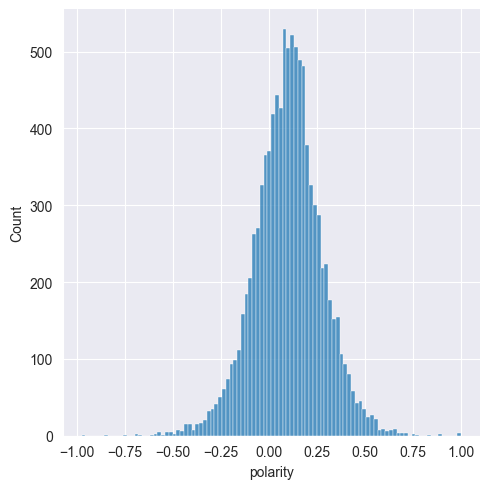

In [8]:
import seaborn as sns
%matplotlib inline
sns.displot(reviews['polarity'])